In [73]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [50]:
df = pd.read_csv('Mall_Customers.csv')

In [51]:
df.shape

(200, 5)

In [52]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [53]:
df = df.drop(columns=['CustomerID'])

In [54]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [55]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


## EDA

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

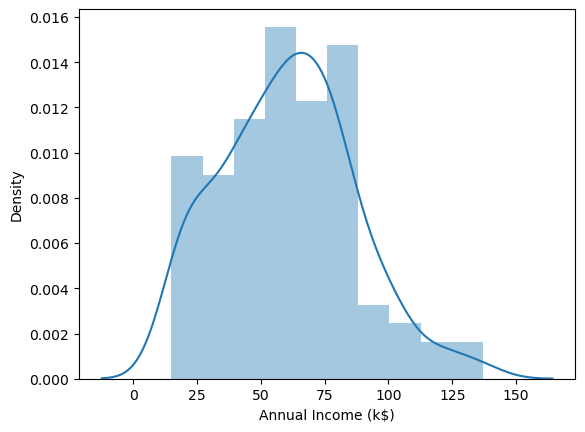

In [57]:
sns.distplot(df['Annual Income (k$)'])

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

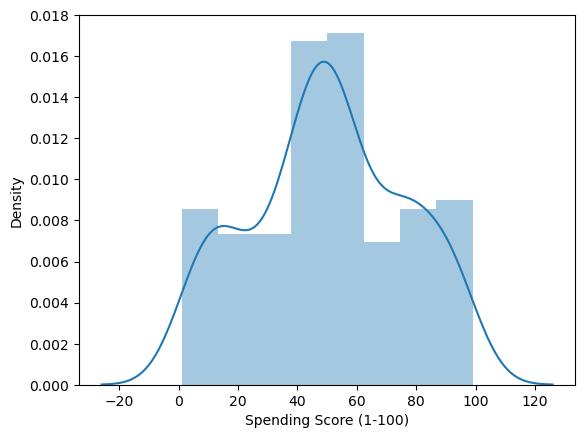

In [58]:
sns.distplot(df['Spending Score (1-100)'])

<Axes: xlabel='Age', ylabel='Density'>

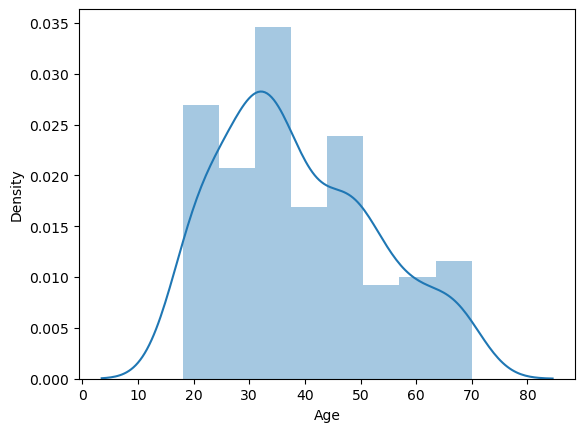

In [59]:
sns.distplot(df['Age'])

<Axes: xlabel='Gender'>

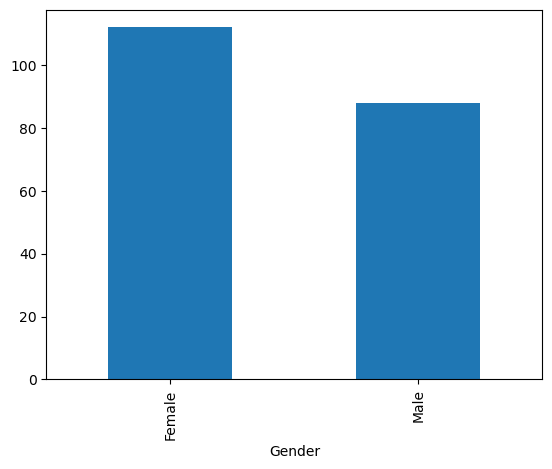

In [60]:
df['Gender'].value_counts().plot(kind = 'bar')

### Applying the Model

In [61]:
temp = df.drop(columns=['Gender'])

In [62]:
scaler  = StandardScaler()

In [63]:
temp_scaled = scaler.fit_transform(temp)

In [64]:
temp_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [65]:
temp_df = pd.DataFrame(temp_scaled,columns=['age','income','spending'])

In [66]:
temp_df.head()

,age,income,spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [94]:
data = pd.concat([df,temp_df],axis=1)

In [95]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),age,income,spending
0,Male,19,15,39,-1.424569,-1.738999,-0.434801
1,Male,21,15,81,-1.281035,-1.738999,1.195704
2,Female,20,16,6,-1.352802,-1.700830,-1.715913
3,Female,23,16,77,-1.137502,-1.700830,1.040418
4,Female,31,17,40,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...,...,...
195,Female,35,120,79,-0.276302,2.268791,1.118061
196,Female,45,126,28,0.441365,2.497807,-0.861839
197,Male,32,126,74,-0.491602,2.497807,0.923953
198,Male,32,137,18,-0.491602,2.917671,-1.250054


In [96]:
data = data.drop(columns=data.iloc[:,[1,2,3]])

In [97]:
data

,Gender,age,income,spending
0,Male,-1.424569,-1.738999,-0.434801
1,Male,-1.281035,-1.738999,1.195704
2,Female,-1.352802,-1.700830,-1.715913
3,Female,-1.137502,-1.700830,1.040418
4,Female,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,Female,-0.276302,2.268791,1.118061
196,Female,0.441365,2.497807,-0.861839
197,Male,-0.491602,2.497807,0.923953
198,Male,-0.491602,2.917671,-1.250054


In [98]:
data = pd.get_dummies(data,columns=['Gender'],drop_first=True)

In [99]:
data['Gender_Male'] = data['Gender_Male'].map({True:1,False:0})

In [100]:
data

,age,income,spending,Gender_Male
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


In [101]:
final_df = data.copy()

In [102]:
from sklearn.cluster import KMeans

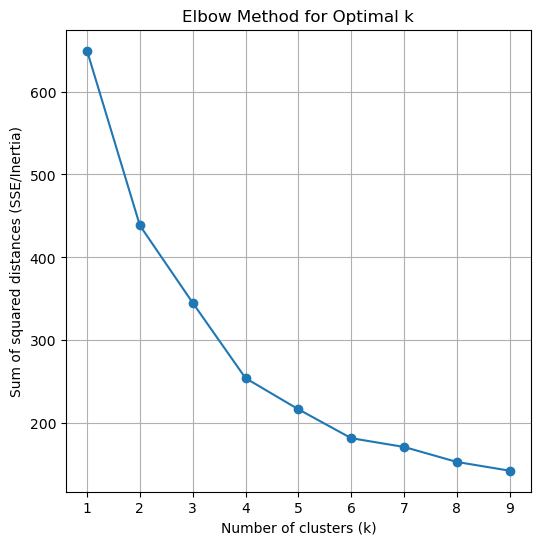

In [105]:
sse = []
list_k = list(range(1, 10))

# Fitting KMeans for each k value and recording SSE (inertia)
for k in list_k:
    km = KMeans(n_clusters=k, random_state=42)  # Set random_state for reproducibility
    km.fit(final_df)
    sse.append(km.inertia_)

# Plotting SSE against the number of clusters
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE/Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(list_k)  # Ensure all k values are shown on the x-axis
plt.grid(True)
plt.show()

In [129]:
km = KMeans(n_clusters=4)
km.fit(final_df)
labels = km.predict(final_df)
centroids = km.cluster_centers_

In [130]:
labels

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 3, 2, 2, 2, 0, 0, 0, 0, 2, 3, 1, 1, 3, 1, 3, 1, 0, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [131]:
centroids

array([[ 1.08616125, -0.49056525, -0.39717443,  0.43076923],
       [-0.42880597,  0.97484722,  1.21608539,  0.45      ],
       [-0.96249203, -0.78476346,  0.39202966,  0.40350877],
       [ 0.03720536,  0.99011499, -1.18875705,  0.5       ]])

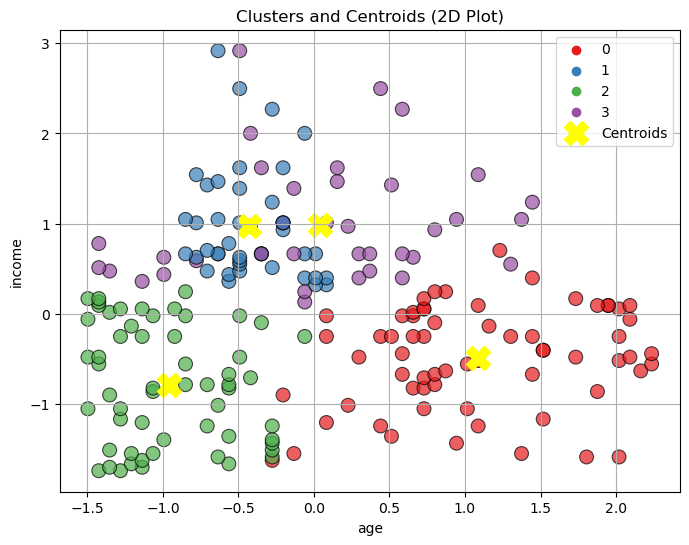

In [132]:
x_col = 'age'
y_col = 'income'

# Scatter plot of the data points with cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=final_df[x_col], y=final_df[y_col], hue=labels, palette='Set1', s=100, alpha=0.7, edgecolor='k')

# Plotting the centroids
plt.scatter(centroids[:, final_df.columns.get_loc(x_col)], 
            centroids[:, final_df.columns.get_loc(y_col)], 
            s=300, c='yellow', marker='X', label='Centroids')

plt.title('Clusters and Centroids (2D Plot)')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend()
plt.grid(True)
plt.show()

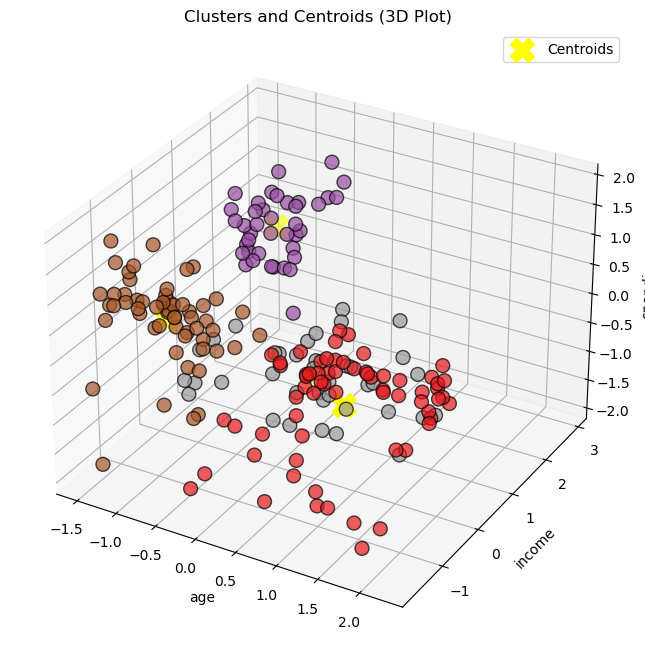

In [133]:
from mpl_toolkits.mplot3d import Axes3D

# Let's assume you are using 'age', 'income', and 'spending' for 3D plotting
x_col = 'age'
y_col = 'income'
z_col = 'spending'

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points with cluster labels
scatter = ax.scatter(final_df[x_col], final_df[y_col], final_df[z_col], 
                     c=labels, s=100, cmap='Set1', alpha=0.7, edgecolor='k')

# Plotting the centroids
ax.scatter(centroids[:, final_df.columns.get_loc(x_col)], 
           centroids[:, final_df.columns.get_loc(y_col)], 
           centroids[:, final_df.columns.get_loc(z_col)], 
           s=300, c='yellow', marker='X', label='Centroids')

# Labeling axes
ax.set_title('Clusters and Centroids (3D Plot)')
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)

plt.legend()
plt.show()


In [134]:
from sklearn.metrics import silhouette_score

score = silhouette_score(final_df, labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.3502702043465398


In [152]:
#   A Silhouette Score of approximately 0.305 indicates that the clusters formed by your KMeans model have 
#          some degree of separation, but the score isn't particularly high.

In [135]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(final_df, labels)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.0650090503369551


In [153]:
#    A Davies-Bouldin Index around 1.0 suggests that the clusters have some overlap, but 
#            they are still relatively distinct from one another

In [136]:
centroids_df = pd.DataFrame(centroids, columns=final_df.columns)
print(centroids_df)

        age    income  spending  Gender_Male
0  1.086161 -0.490565 -0.397174     0.430769
1 -0.428806  0.974847  1.216085     0.450000
2 -0.962492 -0.784763  0.392030     0.403509
3  0.037205  0.990115 -1.188757     0.500000


In [138]:
final_df['Cluster'] = labels  
cluster_summary = final_df.groupby('Cluster').mean()  
print(cluster_summary)

              age    income  spending  Gender_Male
Cluster                                           
0        1.086161 -0.490565 -0.397174     0.430769
1       -0.428806  0.974847  1.216085     0.450000
2       -0.962492 -0.784763  0.392030     0.403509
3        0.037205  0.990115 -1.188757     0.500000


In [151]:
# The cluster summary provides us the insights from the data. We have the gender distribution. Like in cluster 2 40.3% are
# males. Cluster 1 has high incomes and high spending patterns. 

In [150]:
df['Cluster'] = labels

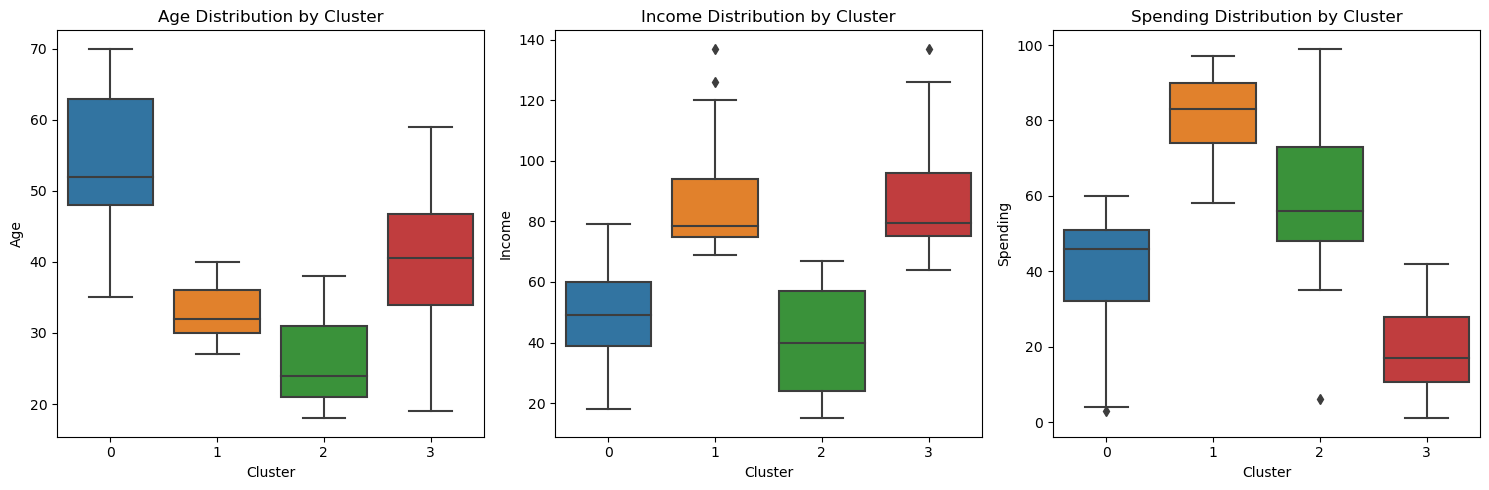

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 5))

# Plot for Age
plt.subplot(1, 3, 1)  # (rows, columns, panel number)
sns.boxplot(x='Cluster', y='Age', data=df)
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')

# Plot for Income
plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df)
plt.title('Income Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')

# Plot for Spending
plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df)
plt.title('Spending Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending')

# Show the plots
plt.tight_layout()  # Adjusts subplot params to give specified padding
plt.show()

### Insights and Conclusions:


- Cluster 0: This cluster appears to be characterized by older individuals with higher incomes and spending habits. They might be retirees or individuals with established careers and financial stability.

- Cluster 1: This cluster seems to be a mix of age groups with a slightly lower average income and spending compared to Cluster 0. This could represent a diverse group of individuals, including young professionals, students, or individuals with moderate incomes.

- Cluster 2: This cluster primarily consists of younger individuals with lower incomes and spending levels. They might be students, entry-level professionals, or individuals with limited financial resources.

- Cluster 3: This cluster exhibits a relatively balanced distribution of age, income, and spending, suggesting a diverse group of individuals with varying demographics and financial situations.